In [1]:
import pandas as pd

from sklearn.linear_model import LinearRegression

In [2]:

from mpl_toolkits.axes_grid1 import make_axes_locatable

**Test theory**

In [3]:
import numpy as np

In [4]:
ps = np.linspace(0, 1, 100)
qs = np.linspace(0, 1, 100)

In [5]:
fixation_probilities = np.zeros((100, 100))
scores = np.zeros((100, 100))
cooperation = np.zeros((100, 100))

In [6]:
import evol_dynamics
import matplotlib.pyplot as plt

In [7]:
N = 100
beta = 1
delta = 0.999
payoffs = [1, 2, 3, 0]

resident = (1/2, 1/2, 1/2)

In [8]:
payoffs

[1, 2, 3, 0]

In [383]:
for i, p in enumerate(ps):
    for j, q in enumerate(qs):
        
        mutant = (0, p, q)

        phi, coop, score = evol_dynamics.fixation_probability_for_expected_payoffs(
            resident,
            mutant,
            N,
            delta,
            beta,
            payoffs,
        )
        fixation_probilities[i, j] = phi
        scores[i, j] = score
        cooperation[i, j] = coop

In [384]:
df = pd.read_csv("matlab/data/expected/clean_S_2_T_3_stochastic_0.csv")

In [385]:
ps, qs = [], []
for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
    for _ in range(int(v)):
        ps.append(p)
        qs.append(q)

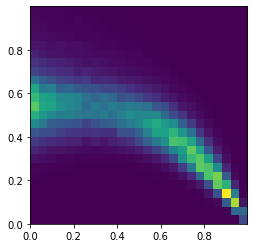

In [386]:
heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=25)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin="lower");

In [387]:
ps = np.linspace(0, 1, 100)
qs = np.linspace(0, 1, 100)

In [40]:
[[0, 0, 1[[1, 0, 1]] * 3

[[1, 0, 1], [1, 0, 1], [1, 0, 1]]

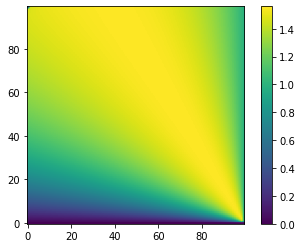

In [388]:
plt.imshow(scores.T, origin="lower");

plt.colorbar();

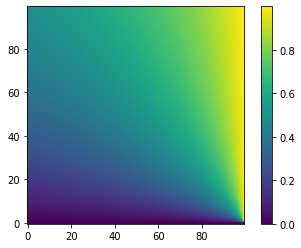

In [416]:
plt.imshow(cooperation.T, origin="lower");

plt.colorbar();

In [390]:
import nashpy as nash

In [399]:
A = [[1, 2], [3, 0]]
B = [[1, 3], [2, 0]]

In [400]:
game = nash.Game(A, B)

In [401]:
for eq in game.support_enumeration():
    print(eq)

(array([1., 0.]), array([0., 1.]))
(array([0., 1.]), array([1., 0.]))
(array([0.5, 0.5]), array([0.5, 0.5]))


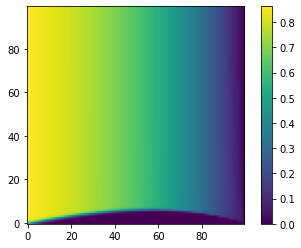

In [417]:
plt.imshow(fixation_probilities.T, origin="lower");

plt.colorbar();

In [395]:
xs = np.linspace(0, 1, 5)

In [403]:
phis = []

for x in xs:

    resident = (x, x, x)

    fixation_probilities = np.zeros((100, 100))

    for i, p in enumerate(ps):
        for j, q in enumerate(qs):

            mutant = (0.5, p, q)

            phi, _, score = evol_dynamics.fixation_probability_for_expected_payoffs(
                resident,
                mutant,
                N,
                delta_val,
                beta,
                payoffs,
            )
            fixation_probilities[i, j] = phi
            
    phis.append(fixation_probilities)

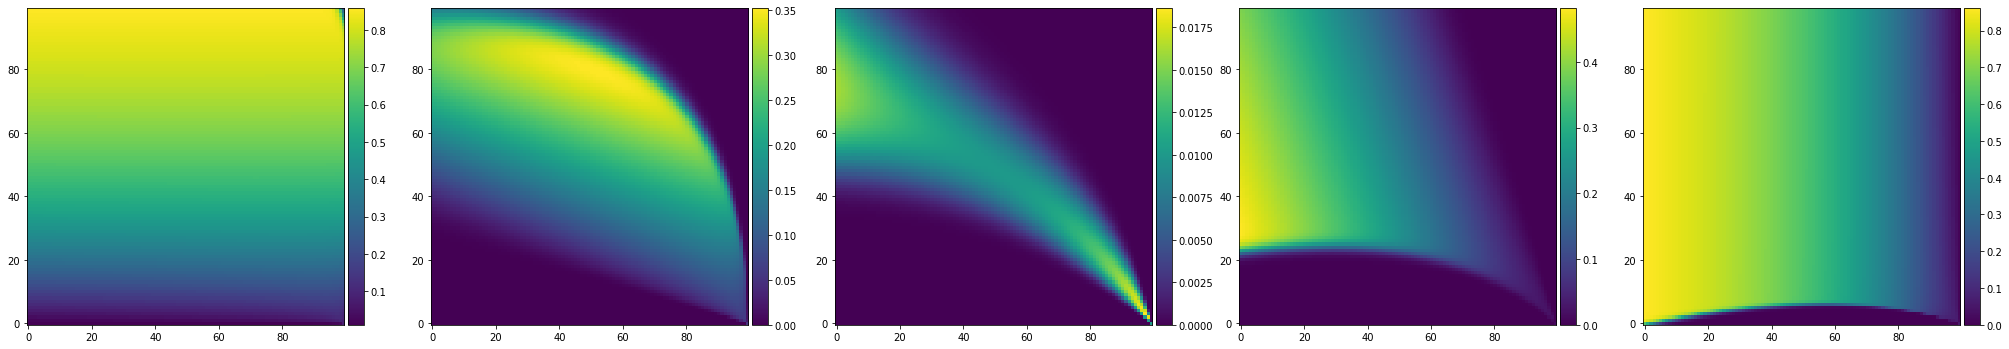

In [404]:
fig, axes = plt.subplots(ncols=5, figsize=(35, 10))

for i, phi in enumerate(phis):
    im = axes[i].imshow(phi.T, origin="lower");
    
    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

In [405]:
payoffs

[1, 2, 3, 0]

In [410]:
resident = (0, 0, 0)

In [411]:
mutant = (1, 1, 1)

In [412]:
phi, _, score = evol_dynamics.fixation_probability_for_expected_payoffs(
                resident,
                mutant,
                N,
                delta_val,
                beta,
                payoffs,
            )

In [413]:
round(phi, 5)

0.23172

In [341]:
import itertools

In [374]:
payoff_vector = np.array([1, 2, 3, 0])

In [375]:
combinations = itertools.product([mutant, resident], repeat=2)

steady_states = [
    evol_dynamics.steady_state(p1, p2, delta_val) for p1, p2 in combinations
]
payoff_MM, payoff_MR, payoff_RM, payoff_RR = [
    state @ payoff_vector for state in steady_states
]

In [376]:
payoff_MM, payoff_MR

(1.3288502099416426e-16, 2.9999999999999996)

In [377]:
payoff_RM, payoff_RR

(1.9999999999997367, 1.0000000000003426)

In [378]:
lminus, lplus = [], []
for k in range(1, N):
    expected_payoff_mutant = ((k - 1) / (N - 1) * payoff_MM) + (
        (N - k) / (N - 1)
    ) * payoff_MR
    expected_payoff_resident = (k / (N - 1) * payoff_RM) + (
        (N - k - 1) / (N - 1)
    ) * payoff_RR

    lplus.append(
        1
        / (
            1
            + np.exp(
                float(
                    -beta
                    * (expected_payoff_mutant - expected_payoff_resident)
                )
            )
        )
    )
    lminus.append(
        1
        / (
            1
            + np.exp(
                float(
                    -beta
                    * (expected_payoff_resident - expected_payoff_mutant)
                )
            )
        )
    )
gammas = np.array(lminus) / np.array(lplus)

In [379]:
gammas

array([0.13670923, 0.14234595, 0.14821507, 0.15432618, 0.16068926,
       0.1673147 , 0.17421332, 0.18139638, 0.1888756 , 0.19666321,
       0.2047719 , 0.21321493, 0.22200608, 0.2311597 , 0.24069074,
       0.25061475, 0.26094794, 0.27170719, 0.28291005, 0.29457483,
       0.30672056, 0.31936707, 0.33253502, 0.3462459 , 0.3605221 ,
       0.37538693, 0.39086465, 0.40698054, 0.42376092, 0.44123317,
       0.45942582, 0.47836859, 0.49809239, 0.51862943, 0.54001324,
       0.56227874, 0.58546227, 0.60960169, 0.63473642, 0.66090748,
       0.68815762, 0.71653131, 0.74607489, 0.7768366 , 0.80886665,
       0.84221734, 0.87694313, 0.91310072, 0.95074913, 0.98994983,
       1.03076684, 1.07326679, 1.11751907, 1.16359593, 1.21157261,
       1.26152743, 1.31354196, 1.36770112, 1.42409333, 1.48281068,
       1.54394902, 1.60760818, 1.6738921 , 1.742909  , 1.81477156,
       1.88959711, 1.96750782, 2.0486309 , 2.1330988 , 2.22104942,
       2.31262638, 2.40797917, 2.5072635 , 2.61064146, 2.71828

In [380]:
1 / (1 + np.sum(np.cumprod(gammas)))

0.6298906554758192

# time for symbolic stuff

In [123]:
import sympy as sym

In [137]:
payoff_vector = np.array(payoffs)

In [307]:
y, p, p_2, q_2, x, delta = sym.symbols("y, p, p_2, q_2, x, delta")

In [303]:
top = df.sort_values('frequencies')[-100:]

In [304]:
x = top.p.values.reshape((-1, 1))
y = top.q.values

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [306]:
q = round(model.intercept_, 3) + round(model.coef_[0], 3) * p

In [308]:
player = (y, p, q)
opponents = (0.5, p_2, q_2)

In [313]:
vPP = np.array(evol_dynamics.expected_distribution_last_round(player, player, delta))

In [310]:
vPP = vPP.reshape((1, 4))

In [319]:
vPP[0].simplify()

(delta*(0.816*p + (1.816*p - 0.94)*(delta*(0.816*p - 0.94) + y*(delta - 1)) - 0.94)**2 + y**2*(delta - 1)*(3.297856*delta*(p - 0.517621145374449)**2 - 1))*(0.303227308894021*delta**2*(p - 0.517621145374449)**2 - 0.09194680085911)/((3.297856*delta*(p - 0.517621145374449)**2 - 1)*(delta**2*(p - 0.517621145374449)**2 - 0.303227308894021)**2)

In [250]:
expr = (vPP @ payoff_vector)[0]

In [251]:
expr.factor()

2.62180774122*(0.478120976027883*delta**3*p**4 - 1.0*delta**3*p**3 + 0.78415031409574*delta**3*p**2 - 0.27322676630056*delta**3*p + 0.0356933037462462*delta**3 - 0.00899256079957536*delta**2*p**3 - 0.127751202995782*delta**2*p**2 + 0.141197173938412*delta**2*p - 0.037614503915089*delta**2 - 0.14292632357337*delta*p**2 + 0.150483229871398*delta*p - 0.0390510879844946*delta + 0.0411326147216268)/((0.960935256066465*delta*p**2 - 1.0*delta*p + 0.260163209146224*delta - 0.277542542033496)*(0.960935256066465*delta**2*p**2 - 1.0*delta**2*p + 0.260163209146224*delta**2 - 0.277542542033496))

In [252]:
delta_val = 0.999

In [253]:
points = [expr.subs({delta:delta_val, p:p_val}) for p_val in ps]

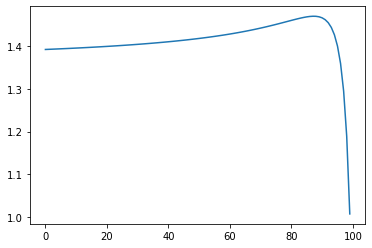

In [254]:
plt.plot(points);

In [255]:
np.argmax(points)

87

In [256]:
ps[np.argmax(points)]

0.8787878787878789

In [257]:
model.intercept_ + model.coef_ * ps[np.argmax(points)]

array([0.21178954])

In [424]:
top.iloc[-1]["y"], top.iloc[-1]["p"], top.iloc[-1]["q"]

(0.342775545, 0.909729191, 0.137395306)

In [422]:
scores_against_opponents = np.zeros((len(ps), len(qs)))

In [176]:
vPO = np.array(evol_dynamics.expected_distribution_last_round(player, opponents, delta))

In [177]:
vPO = vPO.reshape((1, 4))

In [178]:
op_expr = (vPO @ payoff_vector)[0]

In [180]:
op_expr.factor()

2.73101575315913*(0.401082485637461*delta**3*p**2*p_2**2 - 0.979148245836163*delta**3*p**2*p_2*q_2 + 0.0884916372806204*delta**3*p**2*p_2 + 0.578065760198702*delta**3*p**2*q_2**2 - 0.0884916372806204*delta**3*p**2*q_2 - 0.413363955400262*delta**3*p*p_2**2 + 1.0*delta**3*p*p_2*q_2 - 0.0866360445997382*delta**3*p*p_2 - 0.586636044599738*delta**3*p*q_2**2 + 0.0866360445997382*delta**3*p*q_2 + 0.106489786635668*delta**3*p_2**2 - 0.255321534403132*delta**3*p_2*q_2 + 0.0211709805658977*delta**3*p_2 + 0.148831747767464*delta**3*q_2**2 - 0.0211709805658977*delta**3*q_2 - 0.0139297690471798*delta**2*p**2*p_2 + 0.0139297690471798*delta**2*p**2*q_2 - 0.275472122719791*delta**2*p*p_2**2 - 0.38142293915048*delta**2*p*p_2*q_2 + 0.216761979723537*delta**2*p*p_2 - 0.105950816430689*delta**2*p*q_2**2 + 0.588464225149698*delta**2*p*q_2 - 0.211901632861378*delta**2*p + 0.140236378779869*delta**2*p_2**2 + 0.194173447541357*delta**2*p_2*q_2 - 0.105884340559933*delta**2*p_2 + 0.053937068761488*delta**2*q_2*

In [184]:
op_expr.subs({delta:delta_val}).factor()

2.67406928405669*(0.409623861701298*p**2*p_2**2 - 1.0*p**2*p_2*q_2 + 0.0761354828931129*p**2*p_2 + 0.590376138298702*p**2*q_2**2 - 0.0761354828931129*p**2*q_2 - 0.703787019913581*p*p_2**2 + 0.631360224291374*p*p_2*q_2 - 0.201189410947261*p*p_2 - 0.707444374076565*p*q_2**2 + 0.962944229998849*p*q_2 - 0.182496143393236*p + 0.252123764936387*p_2**2 - 0.0622517778136509*p_2*q_2 + 0.131708994576019*p_2 + 0.207142083388577*q_2**2 - 0.423207938472271*q_2 + 0.220849628173901)/((1.0*p*p_2 - 1.0*p*q_2 - 0.509076480753432*p_2 + 0.509076480753432*q_2 - 0.579285983448014)*(1.0*p*p_2 - 1.0*p*q_2 - 0.509076480753432*p_2 + 0.509076480753432*q_2 - 0.579865849297311))

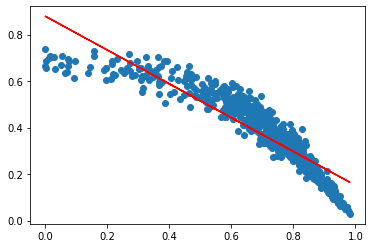

In [78]:
plt.scatter(x, y);

plt.plot(x, model.intercept_ + model.coef_ * x, color='red');

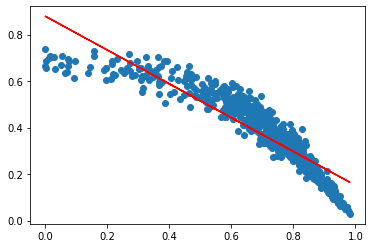

In [79]:
plt.scatter(x, y);

plt.plot(x, model.intercept_ + model.coef_ * x, color='red');

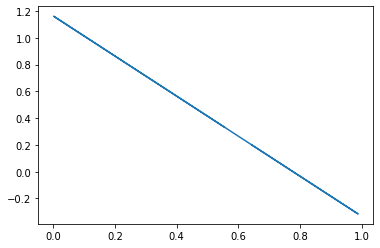

In [229]:
plt.plot(top.p, fit[0] * top.p + fit[1]);

In [210]:
points = [x + fit[0] * y + fit[1] for x, y in zip(top.p, top.q)]

In [214]:
points

[0.7907270578777934,
 1.3985232261579676,
 1.169822787704902,
 0.5427197091752773,
 1.370276707446847,
 1.1133665810683864,
 1.461631221764448,
 0.9797993170605616,
 1.4469571661766039,
 0.8915629261070354,
 1.6332522221196104,
 1.4592818573154347,
 1.3273737746977108,
 1.2708928156877561,
 0.47699079482998263,
 0.39662531346227015,
 1.4150339697124517,
 1.3531611674468857,
 1.7084417838943808,
 0.6879654785461439,
 1.237773644887652,
 1.4020591045063808,
 1.6073231226382707,
 0.9921933870355231,
 1.132473622235043,
 1.5384354196826842,
 1.1674208493463434,
 1.548907525027233,
 1.1291879260542257,
 1.1530447968068813,
 1.2168325746326627,
 1.2451652248595078,
 1.7048005613381971,
 1.3993878700802533,
 1.159674404582064,
 0.7520156952860704,
 1.614161559350413,
 1.5324736865634008,
 0.9450042486120405,
 1.2872379770010534,
 1.4410392916816284,
 0.9837333066971552,
 1.021546687038066,
 1.6861725399403578,
 1.7738158781050215,
 0.9970919016158943,
 0.7668625142848642,
 0.4043795833925554,

In [182]:
df[df['frequencies'] == 3128]

,y,p,q,average cooperation rate,average score,t,frequencies
16984,0.342776,0.909729,0.137395,0.602353,1.464038,2101167,3128


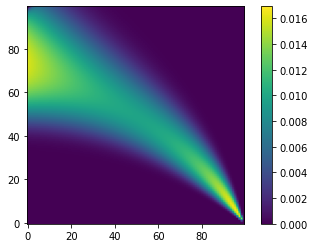

In [177]:
plt.imshow(fixation_probilities.T, origin="lower");

plt.colorbar();

In [80]:
self_scores = np.zeros((100, 100))

payoff_vector = np.array(payoffs)

for i, p in enumerate(ps):
    for j, q in enumerate(qs):
        
        player = (0, p, q)


        ss = evol_dynamics.expected_distribution_last_round(player, player, delta)
        self_scores[i, j] = ss @ payoff_vector

IndexError: index 100 is out of bounds for axis 1 with size 100

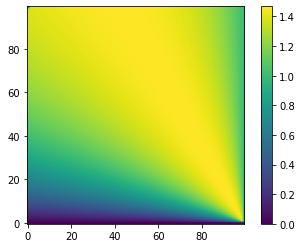

In [171]:
plt.imshow(self_scores.T, origin="lower");

plt.colorbar();

In [8]:
evol_dynamics.donation_game(1, 3)

(2, -1, 3, 0)

In [9]:
evol_dynamics.is_donation((2, -1, 3, 0))

True

In [10]:
payoffs = [1, 2, 3, 0]

In [11]:
evol_dynamics.is_donation(payoffs)

False

In [12]:
c = - 2 

In [13]:
b = 3 

In [14]:
b - c

5

In [9]:
n = 11

Ss = np.linspace(-2, 2, n)

In [10]:
Ss

array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ])

In [11]:
Ts = np.linspace(-1, 3, n)

In [12]:
Ts[5:]

array([1. , 1.4, 1.8, 2.2, 2.6, 3. ])

In [34]:
Ss[:-5]

array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ])

In [35]:
import itertools

In [36]:
pd_payoffs = list(itertools.product(Ts[5:], Ss[:-6]))

In [38]:
for T in Ts[5:]:
    for S in Ss[:-5]:
        u = [1, S, T, 0]
        print(f"S:{round(S, 2)}, T:{round(T, 2)} is donation: {evol_dynamics.is_donation(u)}")

S:-2.0, T:1.0 is donation: False
S:-1.6, T:1.0 is donation: False
S:-1.2, T:1.0 is donation: False
S:-0.8, T:1.0 is donation: False
S:-0.4, T:1.0 is donation: False
S:0.0, T:1.0 is donation: True
S:-2.0, T:1.4 is donation: False
S:-1.6, T:1.4 is donation: False
S:-1.2, T:1.4 is donation: False
S:-0.8, T:1.4 is donation: False
S:-0.4, T:1.4 is donation: False
S:0.0, T:1.4 is donation: False
S:-2.0, T:1.8 is donation: False
S:-1.6, T:1.8 is donation: False
S:-1.2, T:1.8 is donation: False
S:-0.8, T:1.8 is donation: False
S:-0.4, T:1.8 is donation: False
S:0.0, T:1.8 is donation: False
S:-2.0, T:2.2 is donation: False
S:-1.6, T:2.2 is donation: False
S:-1.2, T:2.2 is donation: False
S:-0.8, T:2.2 is donation: False
S:-0.4, T:2.2 is donation: False
S:0.0, T:2.2 is donation: False
S:-2.0, T:2.6 is donation: False
S:-1.6, T:2.6 is donation: True
S:-1.2, T:2.6 is donation: False
S:-0.8, T:2.6 is donation: False
S:-0.4, T:2.6 is donation: False
S:0.0, T:2.6 is donation: False
S:-2.0, T:3.0 is 

In [17]:
evol_dynamics.snowdrift_game(1, 3)

(2.5, 2, 3, 0)

In [20]:
evol_dynamics.is_snowdrift((2.5, 2, 3, 0))

True

In [31]:
for T in Ts[-5:]:
    for S in Ss[-5:]:
        c = T - S
        print(T - c / 2)
#         u = [1, S, T, 0]
#         print(f"S:{round(S, 2)}, T:{round(T, 2)} is snowdrift: {evol_dynamics.is_snowdrift(u)}")

0.9000000000000004
1.1000000000000003
1.3000000000000003
1.5000000000000002
1.7000000000000002
1.1000000000000003
1.3000000000000003
1.5000000000000002
1.7000000000000002
1.9000000000000001
1.3000000000000003
1.5000000000000002
1.7000000000000002
1.9000000000000001
2.1
1.5000000000000002
1.7000000000000002
1.9000000000000001
2.1
2.3
1.7000000000000002
1.9000000000000001
2.1
2.3
2.5
